# FashionMNIST

In [1]:
from nimrod.utils import set_seed
from nimrod.models.core import lr_finder, train_one_cycle

from hydra.utils import instantiate
from omegaconf import OmegaConf
from rich import print

%load_ext autoreload
%autoreload 2
set_seed()


[14:47:37] INFO - PyTorch version 2.5.1 available.
Seed set to 42
Seed set to 42


## Data

[14:47:38] INFO - Init ImageDataModule for fashion_mnist
[14:47:42] INFO - loading dataset fashion_mnist with args () from split train
[14:47:50] INFO - loading dataset fashion_mnist with args () from split test
[14:47:53] INFO - split train into train/val [0.8, 0.2]
[14:47:53] INFO - train: 48000 val: 12000, test: 10000


_target_: nimrod.image.datasets.ImageDataModule
name: fashion_mnist
data_dir: ../data/image
train_val_split:
- 0.8
- 0.2
batch_size: 512
num_workers: 0
pin_memory: false
persistent_workers: false
transforms:
  _target_: torchvision.transforms.Compose
  transforms:
  - _target_: torchvision.transforms.ToTensor
  - _target_: torchvision.transforms.Resize
    size: 32

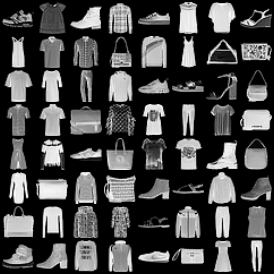

In [2]:
cfg = OmegaConf.load('../config/data/image/fashion_mnist.yaml')
cfg.data_dir = "../data/image"
cfg.batch_size = 512
cfg.num_workers = 0
dm = instantiate(cfg)
dm.prepare_data()
dm.setup()
print(OmegaConf.to_yaml(cfg))
xb, yb = next(iter(dm.train_dataloader()))
dm.show_batch(xb[:64])

## MLP

1024

[14:49:08] INFO - MLP: init
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:49:08] INFO - MLP_X init
[14:49:08] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[14:49:12] INFO - loading dataset fashion_mnist with args () from split train
[14:49:19] INFO - loading dataset fashion_mnist with args () from split test
[14:49:22] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:49:22] WARNING - no scheduler has been setup
/Users/slegroux/minifor

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 90 steps due to diverging loss.
Learning rate set to 0.001778279410038923
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_2389562d-abe0-4e8f-a508-b26c2bdf8f8f.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_2389562d-abe0-4e8f-a508-b26c2bdf8f8f.ckpt


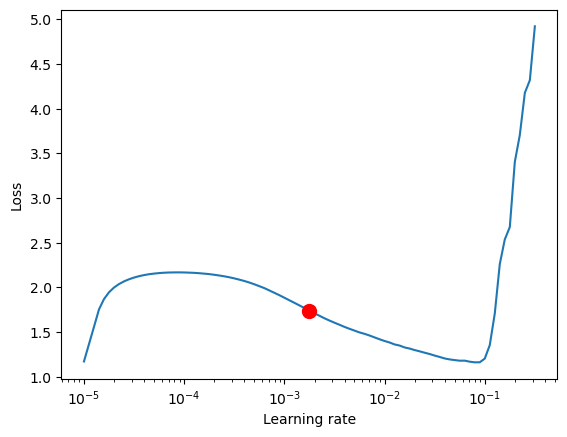

Suggested learning rate: 0.001778279410038923

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:49:33] INFO - MLP_X init
[14:49:33] INFO - Classifier: init
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: slegroux. Use `wandb login --relogin` to force relogin


[14:49:36] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:49:36] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | MLP                | 264 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
264 K     Trainable params
0         Non-trainable params
264 K     Total params
1.060     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │     0.861299991607666     │
│         test/loss         │    0.3925398588180542     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▁▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆██████
lr-AdamW,▁▂▂▂▃▅▅▆▆▆██████████▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▇▇██
train/acc_step,▁▂▂▅▅▆▇▇▇▇▇▇▇▇▇▇▇███▇██▇▇▇███████▇█████▇
train/loss_epoch,█▂▁▁▁
train/loss_step,█▇▇▆▂▂▂▂▂▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇█████
val/acc,▁▅▇██
val/acc_best,▁▅▇██


In [3]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

cfg_model = OmegaConf.load('../config/model/image/mlpx.yaml')
cfg_model.nnet.n_in = dm.dim[0] * dm.dim[1]
print(cfg_model.nnet.n_in)
cfg_model.nnet.n_h = 256
cfg_model.nnet.dropout = 0.1
model = instantiate(cfg_model) #partial

tags = [f"n_h:{cfg_model.nnet.n_h}", f"dropout:{cfg_model.nnet.dropout}","bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name='FASHION-MNIST-Classifier',
    tags=tags,
    model_summary=False
    )

## ConvNet

Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:50:21] INFO - ConvNetX: init
[14:50:21] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[14:50:24] INFO - loading dataset fashion_mnist with args () from split train
[14:50:34] INFO - loading dataset fashion_mnist with args () from split test
[14:50:37] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:50:37] WARNING - no scheduler has been setup
/Users/slegroux/miniforge3/envs/

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.004466835921509632
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_b6e11b5c-819c-4b91-8419-b6dfc3b290ff.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_b6e11b5c-819c-4b91-8419-b6dfc3b290ff.ckpt


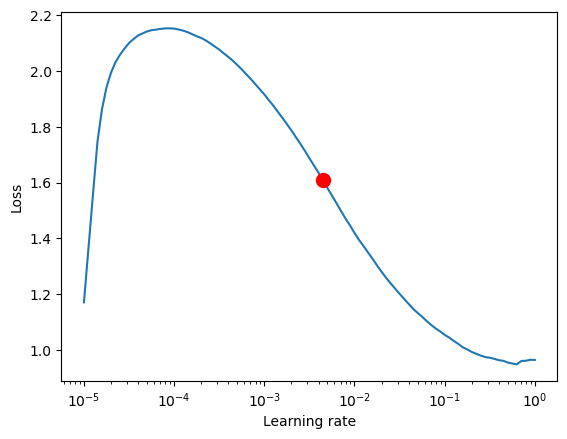

Suggested learning rate: 0.004466835921509632

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:50:44] INFO - ConvNetX: init
[14:50:44] INFO - Classifier: init


==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
ConvNet                                  [512, 10]                 --
├─Sequential: 1-1                        [512, 10]                 --
│    └─ConvLayer: 2-1                    [512, 16, 16, 16]         176
│    └─ConvLayer: 2-2                    [512, 32, 8, 8]           4,672
│    └─ConvLayer: 2-3                    [512, 64, 4, 4]           18,560
│    └─ConvLayer: 2-4                    [512, 32, 2, 2]           18,496
│    └─ConvLayer: 2-5                    [512, 10, 1, 1]           2,890
│    └─Flatten: 2-6                      [512, 10]                 --
==========================================================================================
Total params: 44,794
Trainable params: 44,794
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 360.24
==========================================================================================
Input size (MB): 2.10
Forward/backward pass size (MB): 59.81
Params size (MB): 0.18
Estimated Total Size (MB): 62.09
==========================================================================================

[14:50:45] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:50:45] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ConvNet            | 44.8 K | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
44.8 K    Trainable params
0         Non-trainable params
44.8 K    Total params
0.179     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9093999862670898     │
│         test/loss         │    0.2442120611667633     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆█████
lr-AdamW,▁▂▂▂▂▃▃▃▅▆█████▇▇▇▆▆▆▆▆▅▅▄▄▄▃▃▃▃▂▂▂▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▆▇██
train/acc_step,▁▃▄▄▄▅▅▅▆▅▇▇▇▇▇▇▇▇▇▇██▇█▇▇██████████████
train/loss_epoch,█▂▂▁▁
train/loss_step,█▆▅▄▄▂▂▂▂▁▂▂▂▂▂▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇████
val/acc,▁▃▄▇█
val/acc_best,▁▃▄▇█


In [4]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
project_name = 'FASHION-MNIST-Classifier'

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
feats_dim = [1, 16, 32, 64, 32]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]




# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags
    )

## ResNet

In [ ]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
project_name = 'FASHION-MNIST-Classifier'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]




# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags
    )

[15:03:04] INFO - ResNet: init
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
[15:03:04] WARNING - setting conv bias to False as Batchnorm is used
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]